In [8]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#Reading the input excel
df_warner = pd.read_excel("Warner.xlsx")

In [10]:
df_warner.head()

,Commentary,Runs,Delivery_Length,Delivery_Line,Shot_Type,Run/NoRun,Bowler_Type,Bowler_Name,Avg_Ball_Speed,MatchID,...,Beaten/NotBeaten,Home_Away,Good_Bad_Shot,Opponent,Stadium,Shot_Zone,Delivery_Number,Toss,TossDecision,D/N
0,"Amir to Warner, <b>out</b> Bowled!! Amir has d...",0,Full,wicket_to_wicket,Flick,norun,left arm fast medium,Amir,136.4,16484,...,not_beaten,home,bad,Pakistan,The Gabba,Midwicket,19,1,Batting,DN
2,"Amir to Warner, 1 run, short of a good length ...",1,Short,outside_stumps,Unknown,run,left arm fast medium,Amir,136.4,16484,...,not_beaten,home,bad,Pakistan,The Gabba,Cover,17,1,Batting,DN
3,"Hafeez to Warner, 1 run, flatter and on Warner...",1,GoodLength,wicket_to_wicket,Unknown,run,right arm off break,Hafeez,88.5,16484,...,Unknown,home,bad,Pakistan,The Gabba,Unknown,16,1,Batting,DN
4,"Hafeez to Warner, <b>FOUR</b>, Warner is off a...",4,Unknown,Unknown,Pull_hook,run,right arm off break,Hafeez,88.5,16484,...,not_beaten,home,good,Pakistan,The Gabba,Midwicket,15,1,Batting,DN
5,"Amir to Warner, no run, this is even better! A...",0,Full,Unknown,Drive,norun,left arm fast medium,Amir,136.4,16484,...,not_beaten,home,bad,Pakistan,The Gabba,Unknown,14,1,Batting,DN


In [11]:
df_warner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 12
Data columns (total 22 columns):
Commentary          2373 non-null object
Runs                2373 non-null int64
Delivery_Length     2373 non-null object
Delivery_Line       2373 non-null object
Shot_Type           2373 non-null object
Run/NoRun           2373 non-null object
Bowler_Type         2373 non-null object
Bowler_Name         2373 non-null object
Avg_Ball_Speed      2373 non-null float64
MatchID             2373 non-null int64
Dismiss             2373 non-null int64
Dismissal_Type      43 non-null object
Beaten/NotBeaten    2373 non-null object
Home_Away           2373 non-null object
Good_Bad_Shot       2373 non-null object
Opponent            2373 non-null object
Stadium             2373 non-null object
Shot_Zone           2373 non-null object
Delivery_Number     2373 non-null int64
Toss                2373 non-null int64
TossDecision        2373 non-null object
D/N                 2373 non-null object

# Exploratory Data Analysis

In [12]:
#Average run rate per over for a given opponent
df1 = df_warner.groupby(['Opponent'])['Runs'].sum()/df_warner.groupby(['Opponent'])['Run/NoRun'].count()*6
df1

Opponent
England         5.371429
India           5.777778
Ireland         8.727273
New Zealand     6.712401
Pakistan        6.581818
South Africa    6.188679
Sri Lanka       4.881356
West Indies     6.214286
dtype: float64

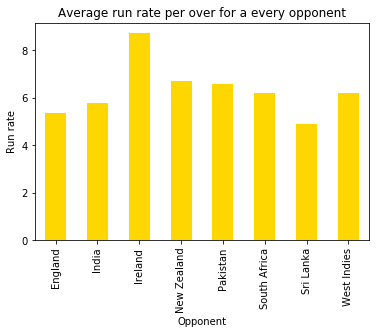

In [13]:
df1.plot(kind = 'bar', title = 'Average run rate per over for a every opponent', color = 'gold')
plt.ylabel('Run rate')
plt.show()

In [14]:
#Average run rate per over for a given ball type
df2 = df_warner.groupby(['Bowler_Type'])['Runs'].sum()/df_warner.groupby(['Bowler_Type'])['Run/NoRun'].count()*6
df2

Bowler_Type
left arm chinaman        5.000000
left arm fast medium     5.677686
left arm medium          3.428571
left arm orthodox        6.043011
right arm fast           7.528662
right arm fast medium    7.040541
right arm leg break      6.378378
right arm medium         5.250000
right arm off break      5.649485
right arm offbreak       6.646154
dtype: float64

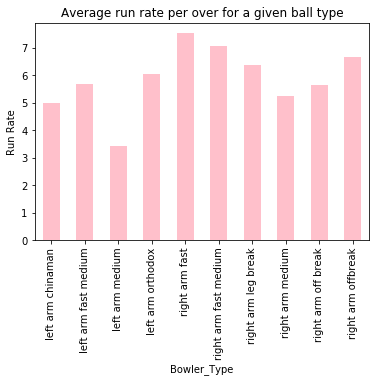

In [15]:
df2.plot(kind = 'bar', title = 'Average run rate per over for a given ball type', color = 'pink')
plt.ylabel('Run Rate')
plt.show()

# Inference: 
**It can be seen that David Warner tends to score most runs against right handed bowlers as compared to left handed bowlers**

In [16]:
#Strike rate per 100 balls
df3 = (df_warner.groupby(['Delivery_Length'])['Runs'].sum()/df_warner.groupby(['Delivery_Length'])['Commentary'].count())*100
df3

Delivery_Length
Full           95.447154
FullToss      141.176471
GoodLength    103.305785
Short         115.665796
Unknown        92.668024
dtype: float64

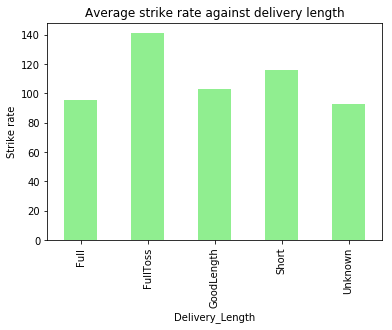

In [17]:
df3.plot(kind = 'bar', title = 'Average strike rate against delivery length', color = 'lightgreen')
plt.ylabel('Strike rate')
plt.show()

# Inference: 
**Plays well against all kinds of balls**

In [19]:
# % of runs scored in differnt shot zone
(df_warner.groupby(['Shot_Zone'])['Runs'].sum()/df_warner['Runs'].sum())*100

Shot_Zone
Cover        18.026101
FineLeg       4.159869
LongOff      10.807504
LongOn        7.177814
Midwicket    13.499184
Point         9.420881
SquareLeg     8.646003
ThirdMan      5.913540
Unknown      22.349103
Name: Runs, dtype: float64

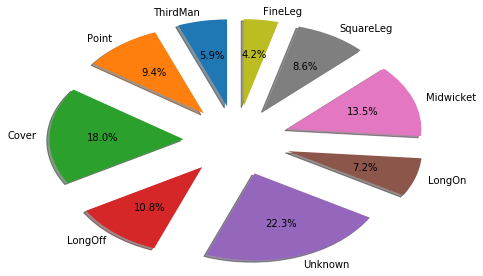

In [35]:
labels = ['ThirdMan', 'Point', 'Cover', 'LongOff', 'Unknown', 'LongOn', 'Midwicket',  'SquareLeg', 'FineLeg']
sizes = ['5.913540', '9.420881', '18.026101', '10.807504', '22.349103', '7.177814', '13.499184', '8.646003', '4.159869']
explode = (0.4, 0.4, 0.4, 0.4,0.4, 0.4, 0.4, 0.4,0.4)
wedges, patches, texts = plt.pie(sizes, labels=labels, shadow=True, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

# Inference:
**Cover seems to be high scoring region for Warner, followed by Long Off**

In [22]:
#% of good shot and bad shots played for each opponent
(df_warner.groupby(['Opponent','Good_Bad_Shot']).size()/df_warner.groupby(['Opponent'])['Good_Bad_Shot'].count())*100

Opponent      Good_Bad_Shot
England       bad              76.190476
              good             23.809524
India         bad              70.370370
              good             29.629630
Ireland       bad              72.727273
              good             27.272727
New Zealand   bad              65.963061
              good             34.036939
Pakistan      bad              73.333333
              good             26.666667
South Africa  bad              71.488470
              good             28.511530
Sri Lanka     bad              71.751412
              good             28.248588
West Indies   bad              69.642857
              good             30.357143
dtype: float64

In [27]:
#Subsetting to get only dismissal data
df_WarnerDismissal = df_warner.loc[(df_warner.Dismissal == 1),:]

df_Warner_col = ['Bowler_Type','Delivery_Length','Delivery_Line','Shot_Type', 'Dismissal_Type']

for i in df_Warner_col:
    print(df_WarnerDismissal[i].value_counts())

left arm fast medium     12
right arm fast medium     8
right arm medium          8
right arm fast            4
right arm off break       4
left arm orthodox         3
left arm medium           1
left arm chinaman         1
right arm offbreak        1
right arm leg break       1
Name: Bowler_Type, dtype: int64
Short         13
Full          10
GoodLength    10
Unknown       10
Name: Delivery_Length, dtype: int64
outside_stumps      19
wicket_to_wicket    12
Unknown             12
Name: Delivery_Line, dtype: int64
Unknown           13
Edge               8
Pull_hook          6
Drive              5
No_shot            4
Defensive_shot     2
Flick              2
Late_Cut           2
Sweep              1
Name: Shot_Type, dtype: int64
 Caught!!           28
 Bowled!!            8
 Run Out!!           3
 Caught&Bowled!!     2
 Lbw!!               2
Name: Dismissal_Type, dtype: int64


# Inference:
**David Warner has most dismissals from Short balls outside off stumps**

# Vizualization

Target variables distribution

Text(0,0.5,'Count of balls')

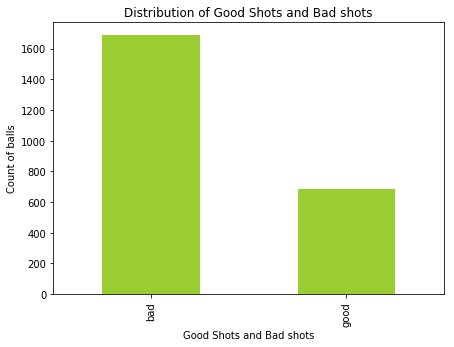

In [30]:
#Distribution of Good Shots and Bad shots
plt.figure(figsize=(7,5))
y = ['Good_Bad_Shot']
df_warner['Good_Bad_Shot'].value_counts().plot(kind='bar',color=['yellowgreen'])
plt.title("Distribution of Good Shots and Bad shots")
plt.xlabel("Good Shots and Bad shots")
plt.ylabel("Count of balls")

Text(0,0.5,'Count of balls')

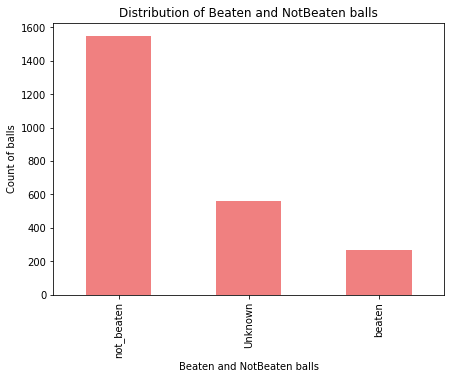

In [31]:
#Distribution of Beaten and NotBeaten balls
plt.figure(figsize=(7,5))
df_warner['Beaten/NotBeaten'].value_counts().plot(kind='bar',color=['lightcoral'])
plt.title("Distribution of Beaten and NotBeaten balls")
plt.xlabel("Beaten and NotBeaten balls")
plt.ylabel("Count of balls")

Text(0,0.5,'Count of Type of dismissal')

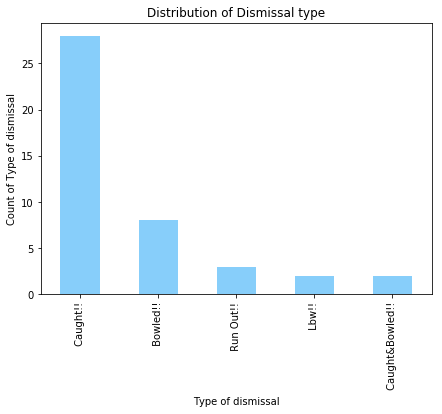

In [32]:
#Distribution of Dismissal type
plt.figure(figsize=(7,5))
df_warner['Dismissal_Type'].value_counts().plot(kind='bar',color=['lightskyblue'])
plt.title("Distribution of Dismissal type")
plt.xlabel("Type of dismissal")
plt.ylabel("Count of Type of dismissal")

# Vizualization of all the X variables against Y Variables

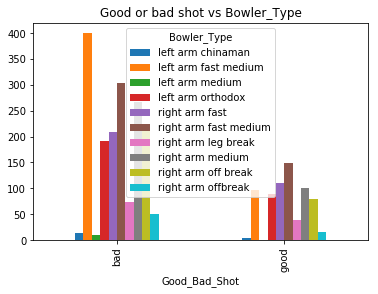

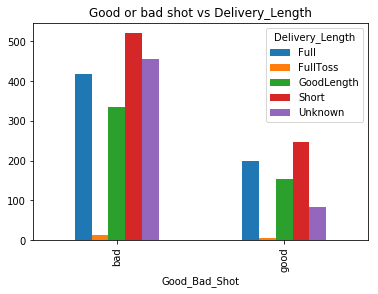

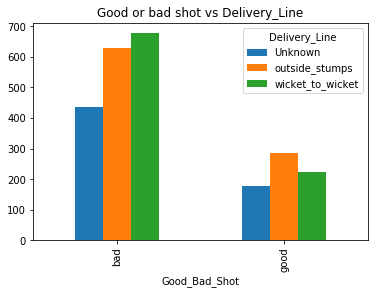

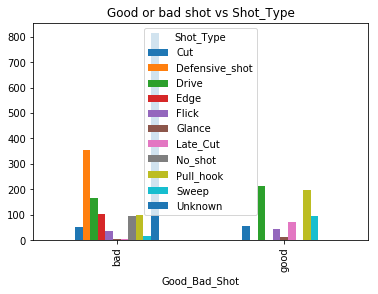

In [33]:
df_warner2 = ['Bowler_Type','Delivery_Length','Delivery_Line','Shot_Type']
for i in df_warner2:
    if(i!='Good_Bad_Shot'): 
        cross_tab = pd.crosstab(df_Rohit['Good_Bad_Shot'],df_Rohit[i])
        cross_tab.plot(kind='bar')
        plt.title("Good or bad shot vs"+" "+i)

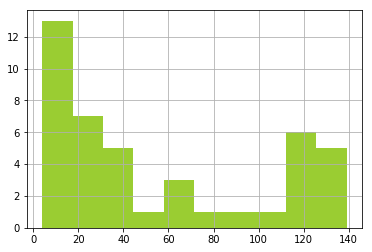

In [37]:
df_WarnerDismissal['Delivery_Number'].hist(color = 'yellowgreen')

# Inference:
**From the data it can be seen that the probability of getting Daivd Warner's wicket decreases steadily till he plays 40+ balls.**